## EXPLORATION_15 문자를 읽을 수 있는 딥러닝

문자를 읽는 기술인 OCR은 산업적으로 매우 유용한 기술이다. 딥러닝이 도입된 이후에는 OCR 기술이 획기적으로 개선되어 많은 산업 도메인에 유용하게 사용될 수 있는 가능성이 있다.   

< OCR 기술 활용 사례>   
- 우편번호 추출을 통한 우편물 관리  
- 자동차 번호판 인식  
- 모바일 기기를 사용한 명함 인식  
- 신용카드 읽기를 이용한 결제 서비스  
- 컨테이너 일련번호 인식을 이용한 스마트 선박 시스템

<준비물>   
개인 실습환경에 따라서 디렉터리를 생성  
$ mkdir -p ~/aiffel/ocr_python

구글 OCR API 를 사용하면 사진속의 글자를 잘 읽을 수 있다.  
일단 파이썬으로 호출해서 테스트만 해보자!

## Step1. 검증용 데이터셋 준비

In [1]:
## 필요한 라이브러리 import 하기

import os
import glob

import cv2

import matplotlib.pyplot as plt
import matplotlib.image as img

## keras-ocr
import keras_ocr

## tesseract
import pytesseract
from PIL import Image
from pytesseract import Output
import re

## Google OCR API
from google.cloud import vision
import io
from PIL import ImageDraw

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [2]:
## 필요한 데이터셋 가져오기!
data_path = os.getenv('HOME')+'/aiffel/ocr_python/test_image/'

images_path = glob.glob(data_path+"*.jpg")
images_path

['/aiffel/aiffel/ocr_python/test_image/3.jpg',
 '/aiffel/aiffel/ocr_python/test_image/14.jpg',
 '/aiffel/aiffel/ocr_python/test_image/6.jpg',
 '/aiffel/aiffel/ocr_python/test_image/4.jpg',
 '/aiffel/aiffel/ocr_python/test_image/2.jpg',
 '/aiffel/aiffel/ocr_python/test_image/16.jpg',
 '/aiffel/aiffel/ocr_python/test_image/8.jpg',
 '/aiffel/aiffel/ocr_python/test_image/10.jpg',
 '/aiffel/aiffel/ocr_python/test_image/12.jpg',
 '/aiffel/aiffel/ocr_python/test_image/13.jpg',
 '/aiffel/aiffel/ocr_python/test_image/9.jpg',
 '/aiffel/aiffel/ocr_python/test_image/18.jpg',
 '/aiffel/aiffel/ocr_python/test_image/15.jpg',
 '/aiffel/aiffel/ocr_python/test_image/5.jpg',
 '/aiffel/aiffel/ocr_python/test_image/11.jpg',
 '/aiffel/aiffel/ocr_python/test_image/1.jpg',
 '/aiffel/aiffel/ocr_python/test_image/7.jpg',
 '/aiffel/aiffel/ocr_python/test_image/17.jpg']

ValueError: num must be 1 <= num <= 15, not 16

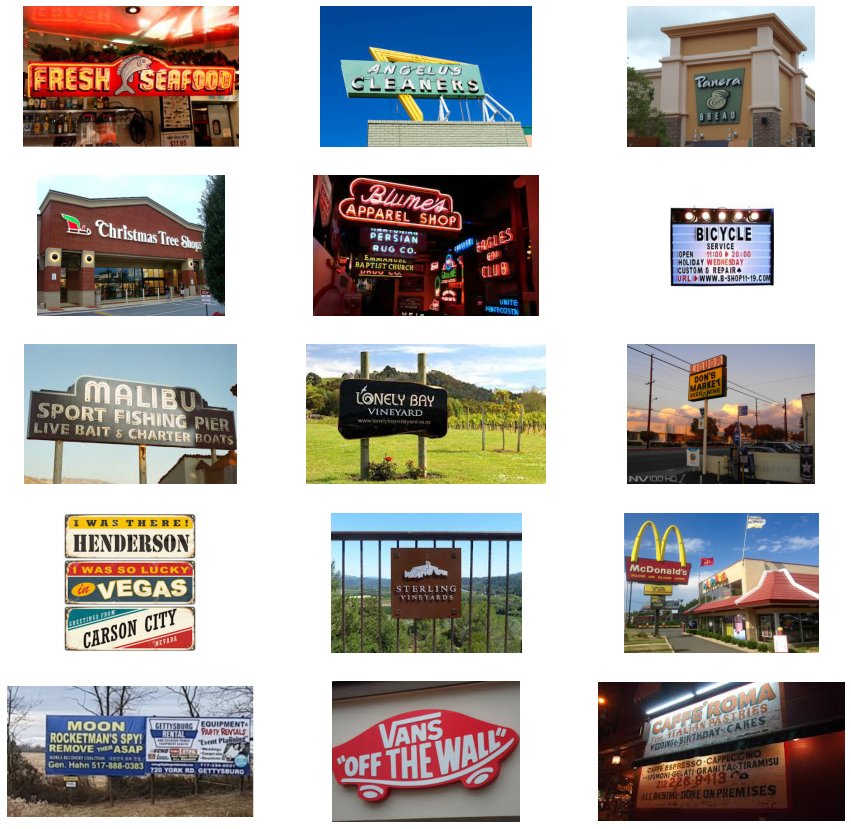

In [3]:
plt.figure(figsize=(15, 15))

for i, image in enumerate(images_path,1):
    plt.subplot(5, 3, i)
    plt.imshow(img.imread(image))
    plt.axis('off')

## Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)

### keras-ocr test

In [4]:
import matplotlib.pyplot as plt
import keras_ocr

## keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 된다! 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [5]:
images = [keras_ocr.tools.read(im) for im in images_path]
predictions = [pipeline.recognize([im]) for im in images_path]

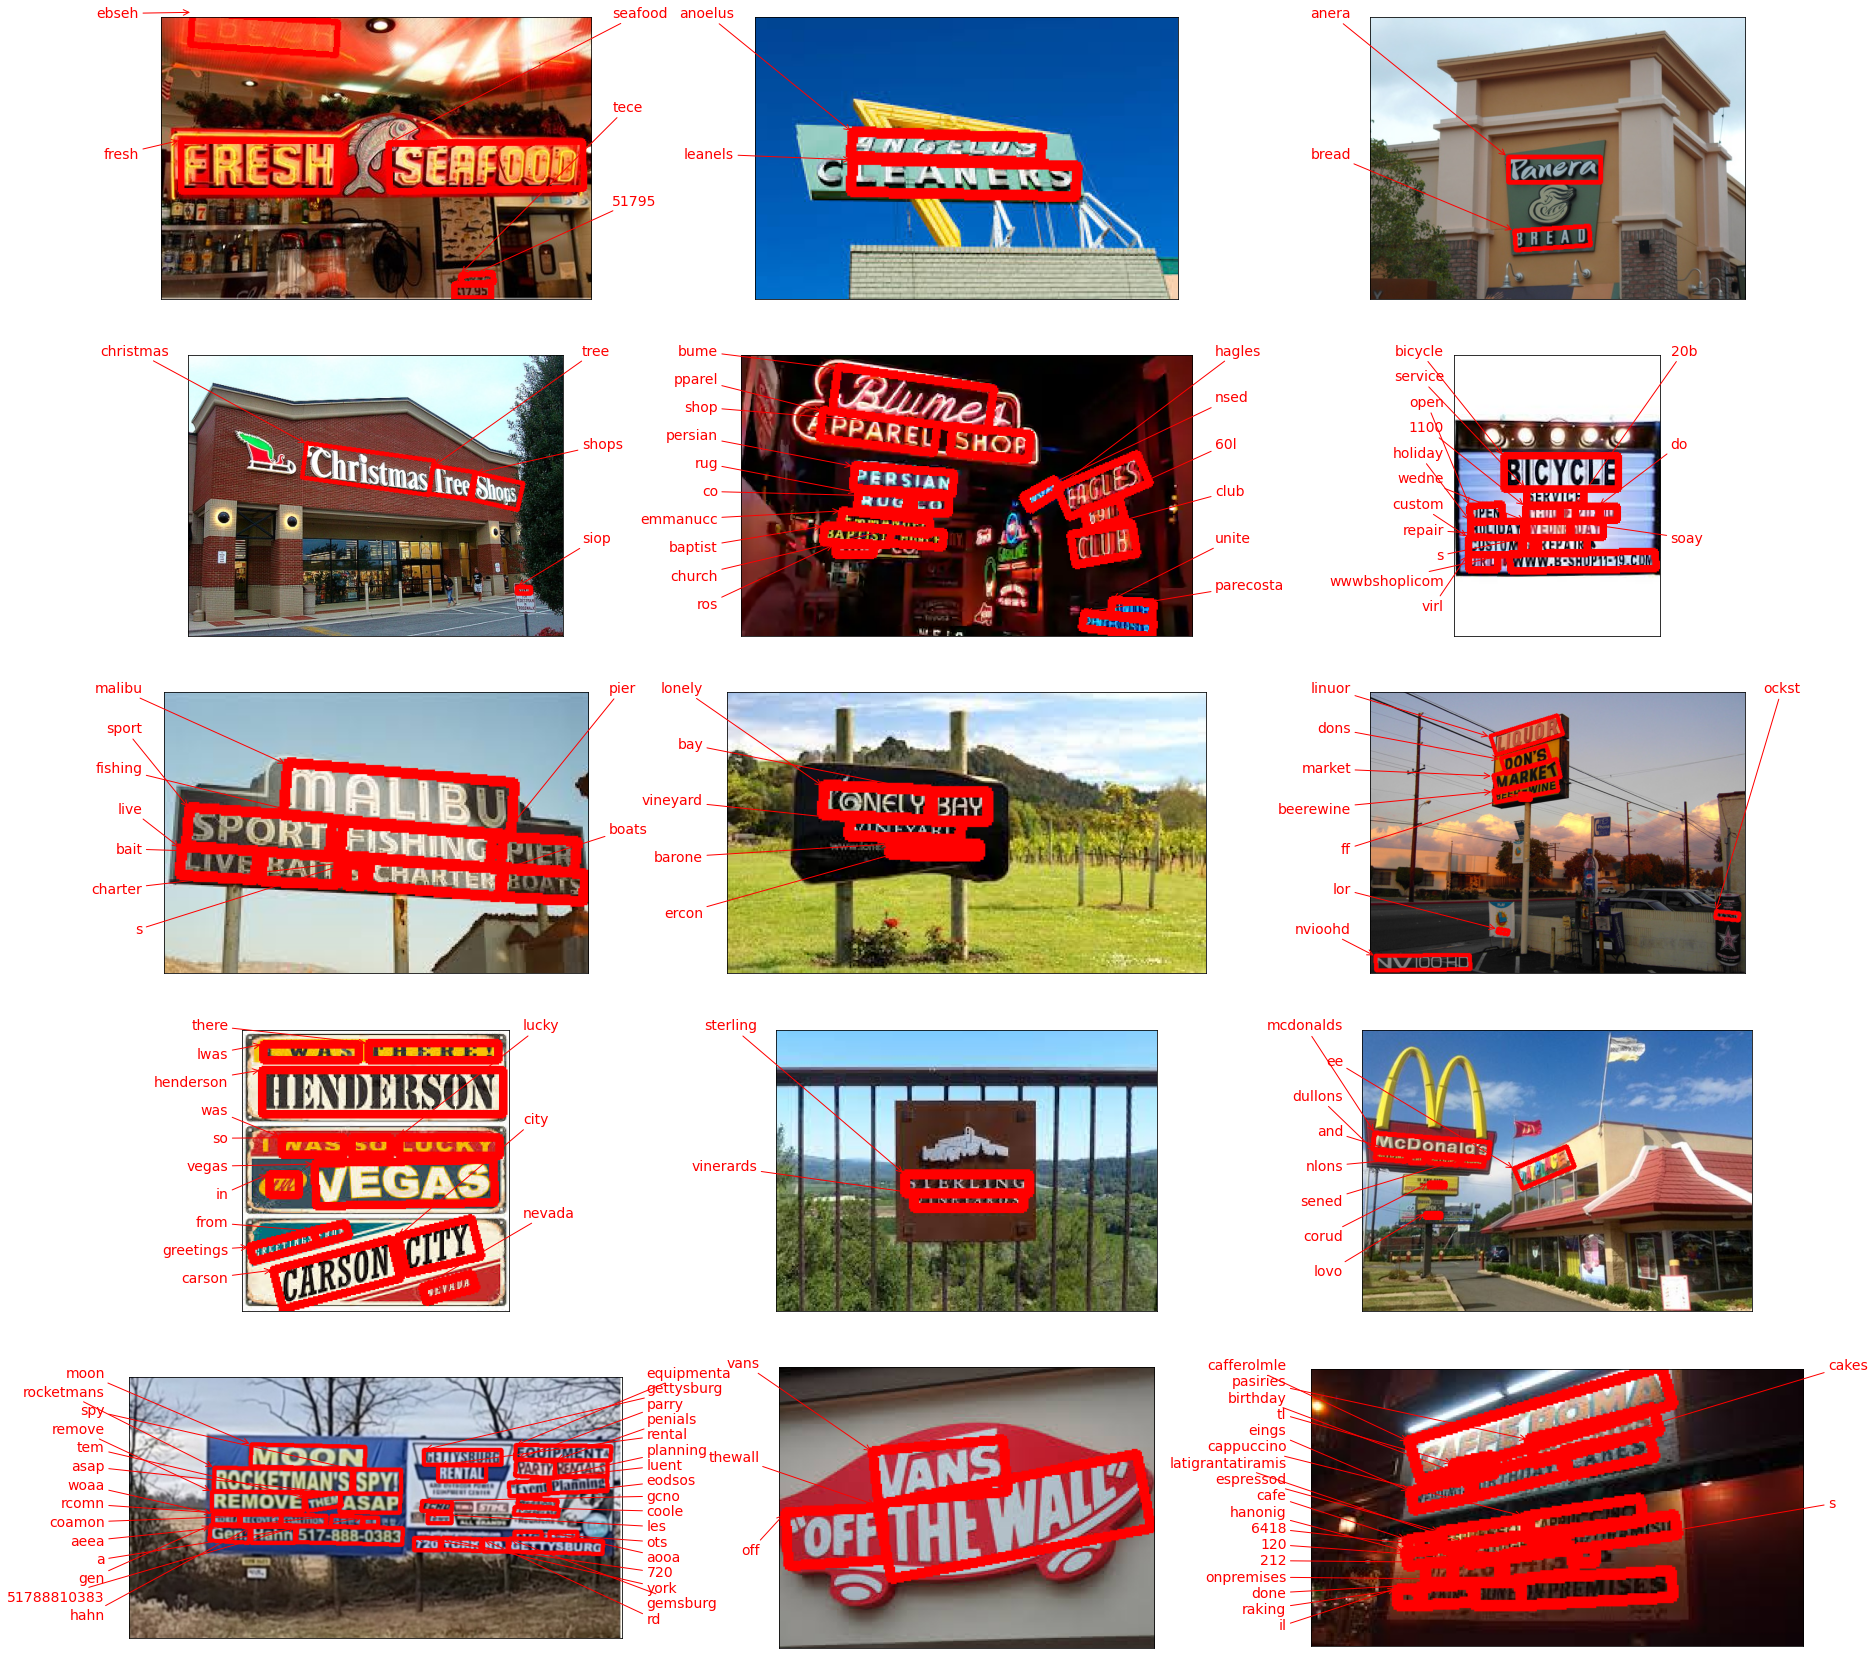

In [6]:
fig, axs = plt.subplots(5, 3, figsize=(30, 30))
for a in range(len(axs)):
    for b in range(len(axs[a])):
        keras_ocr.tools.drawAnnotations(image=images[3*a+b], 
                                    predictions=predictions[3*a+b][0], ax=axs[a,b])

### Google OCR API

In [7]:
def detect_text(path):
    """Detects text in the file."""
    text_dec = []
    bounds = []
    client = vision.ImageAnnotatorClient()
    
    with io.open(path, 'rb') as image_file:
        content = image_file.read()
    
    name = os.path.basename(path)
    
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations

    for text in texts:
        text_dec.append(text.description.replace('\n',''))
        vertices = text.bounding_poly
        bounds.append(vertices)
    
    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
        
    return name, text_dec, bounds

In [8]:
def draw_boxes(image, bounds, color):
    """Draw a border around the image using the hints in the vector list."""
    draw = ImageDraw.Draw(image)

    for bound in bounds:
        draw.polygon([
            bound.vertices[0].x, bound.vertices[0].y,
            bound.vertices[1].x, bound.vertices[1].y,
            bound.vertices[2].x, bound.vertices[2].y,
            bound.vertices[3].x, bound.vertices[3].y], None, color)
    return image

In [9]:
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

total 75156
drwxr-xr-x 4 root root     4096 Feb 22 08:21  bert_qna
drwxr-xr-x 4 root root     4096 Jan 11 02:39  camera_sticker
drwxr-xr-x 3 root root     4096 Jan 18 14:18  cat_vs_dog
drwxr-xr-x 2 root root     4096 Feb  9 13:05  chest_xray
drwxr-xr-x 2 root root     4096 Jan  6 01:33  data_preprocess
drwxr-xr-x 4 root root     4096 Feb 14 16:35  dcgan_newimage
-rw-r--r-- 1 root root  6484077 Mar  6 12:37 '[E-15]OCR.ipynb'
-rw-r--r-- 1 root root    90892 Jan 12 01:22 '[EX_01]Rock_Scissor_paper.ipynb'
-rw-r--r-- 1 root root    58918 Jan 13 07:26 '[EX_01]RockSicssorpaper(pratice).ipynb'
-rw-r--r-- 1 root root    26365 Jan  8 15:08 '[EX_02]Iris(pratice).ipynb'
-rw-r--r-- 1 root root    54717 Jan 14 14:02 '[EX_02]_load_digits_01.ipynb'
-rw-r--r-- 1 root root    47723 Jan 14 14:09 '[EX_02]_load_wine_02.ipynb'
-rw-r--r-- 1 root root   522473 Jan 20 01:26 '[EX_03]Face_Sticker.ipynb'
-rw-r--r-- 1 root root   513792 Jan 11 10:11 '[EX_03]Face_Sticker(pratice).ipynb'
-rw-r--r-- 1 root root    67

In [10]:
for path in images_path:
    detect_text(path)

PermissionDenied: 403 This API method requires billing to be enabled. Please enable billing on project #742364165329 by visiting https://console.developers.google.com/billing/enable?project=742364165329 then retry. If you enabled billing for this project recently, wait a few minutes for the action to propagate to our systems and retry. [links {
  description: "Google developers console billing"
  url: "https://console.developers.google.com/billing/enable?project=742364165329"
}
, reason: "BILLING_DISABLED"
domain: "googleapis.com"
metadata {
  key: "consumer"
  value: "projects/742364165329"
}
metadata {
  key: "service"
  value: "vision.googleapis.com"
}
]

In [11]:
ocr_img = []
ocr_dict = {}
## 위에서 정의한 OCR API 이용 함수를 호출해보자!
for path in images_path:
    name, text_dec, bounds = detect_text(path)
    ocr_dict[name] = text_dec
    image = Image.open(path)
    draw_boxes(image, bounds, 'red')
    ocr_img.append(image)

PermissionDenied: 403 This API method requires billing to be enabled. Please enable billing on project #742364165329 by visiting https://console.developers.google.com/billing/enable?project=742364165329 then retry. If you enabled billing for this project recently, wait a few minutes for the action to propagate to our systems and retry. [links {
  description: "Google developers console billing"
  url: "https://console.developers.google.com/billing/enable?project=742364165329"
}
, reason: "BILLING_DISABLED"
domain: "googleapis.com"
metadata {
  key: "consumer"
  value: "projects/742364165329"
}
metadata {
  key: "service"
  value: "vision.googleapis.com"
}
]

In [12]:
plt.figure(figsize=(15, 15))

for i, img in enumerate(ocr_img, 1):
    plt.subplot(5, 3, i)
    plt.imshow(img)
    plt.axis('off')

<Figure size 1080x1080 with 0 Axes>

### Tesseract

In [13]:
def detect_box(image_path):
    filename = os.path.basename(image_path)
    # read the image and get the dimensions
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    d = pytesseract.image_to_data(img, output_type=Output.DICT)
    n_boxes = len(d['text'])

    ## draw the bounding boxes on the image
    for i in range(n_boxes):
        if int(d['conf'][i]) > 1: ## confidence가 1 이상인 값들만 출력!
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            text = d['text'][i]
            text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
            cv2.putText(img, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                        1.5, (0, 0, 255), 3)
    return img

ValueError: num must be 1 <= num <= 15, not 16

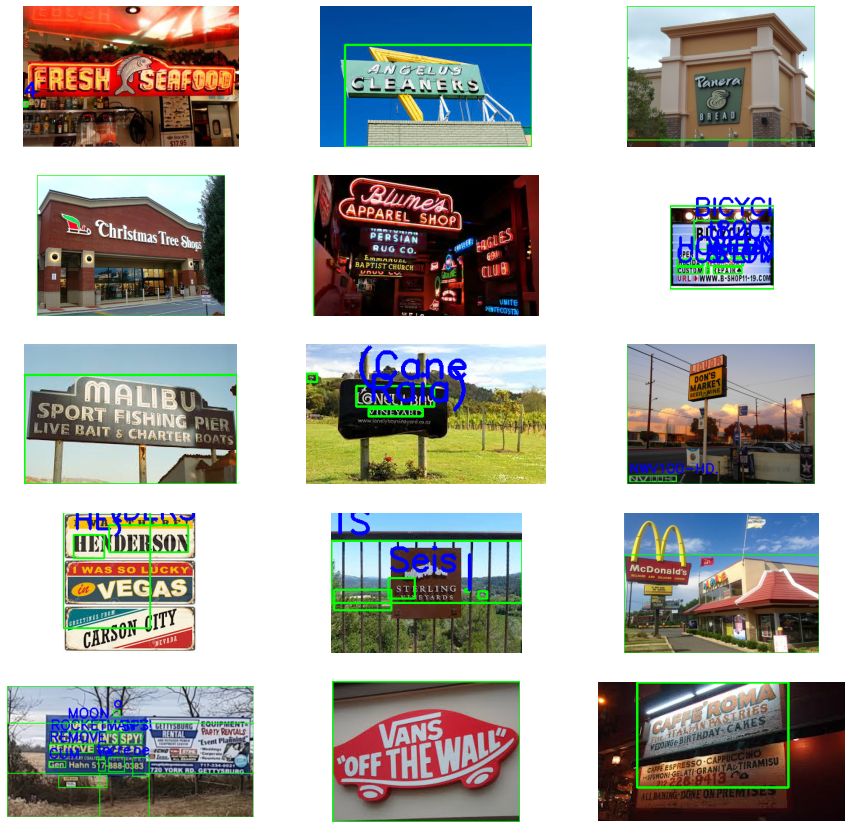

In [14]:
## confidence = 1
plt.figure(figsize=(15, 15))
for i,image_path in enumerate(images_path,1):
    img = detect_box(image_path)
    plt.subplot(5, 3, i)
    plt.imshow(img)
    plt.axis('off')

In [15]:
def extract_text(image_path):
    custom_oem_psm_config = r'--oem 3 --psm 11'
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    txt = pytesseract.image_to_string(img, lang='eng',config=custom_oem_psm_config)
    txt = re.sub(r"\n+"," ",txt)
    return txt

In [16]:
compare_ocr('3.jpg')extract_text(images_path[0])

SyntaxError: invalid syntax (2030591627.py, line 1)

In [17]:
for image_path in images_path:
    filename = os.path.basename(image_path)
    txt = extract_text(image_path)
    txt = "".join([c if ord(c) < 128 else "" for c in txt]).strip()
    print(f'========{filename}========')
    print(txt)

========3.jpg========
sa | 9 oe =
========14.jpg========
. Ah a5 LIK S an Wi
========6.jpg========
a N 1Culee On My a
========4.jpg========
ee 6 FS ae ea 1
========2.jpg========
TEP Lil a Za l e oti Pe oo! EyN trae ay: x ie ag = ae a
========16.jpg========
Ja 2 BICYCLE JOPEN tt 80 20:00 HOLIDAY WEDNESDAY CUSTOM & REPAIRS | UIRIL 1 WWW.B-SHOP11-19.COR
========8.jpg========
Us SPORT ila a ty RO. ~
========10.jpg========
(Cane Raia)
========12.jpg========
po! ns AR BEER, INE  a oi Fld a Sine ee = i = NV100 za
========13.jpg========
HENDERSON = BE on ( cA 250 cry
========9.jpg========
| oe - Ree easton |: Slats v ae ae we
========18.jpg========
re a ae ae NicDonalas err ag pr \" wa
========15.jpg========
ae MOON URG PARTY RENTALS. ROCKETMAN'S SPY! ent Pla REMOVE inten lend fCno Gi Corporate. eee tn CUM ea re cre 0383 ae) YORK RD. GETTYSBURG errr ah oon en cs i i oe _ ee St ~~
========5.jpg========

========11.jpg========
HDA 7 CANES ce soi
========1.jpg========
oo cll a  Oe
========7.jpg==

## Step3. 테스트 결과 정리

### Tesseract

In [18]:
def show_tesseract(num):
    plt.figure(figsize=(15, 15))

    plt.subplot(121)
    org = cv2.imread(images_path[num])
    org = cv2.cvtColor(org, cv2.COLOR_BGR2RGB)
    plt.imshow(org)
    plt.title('Original')
    plt.subplot(122)
    img = detect_box(images_path[num])
    plt.imshow(img)
    plt.title('Detected')
    txt = extract_text(images_path[num])
    print(txt)

a N 1Culee On My a 


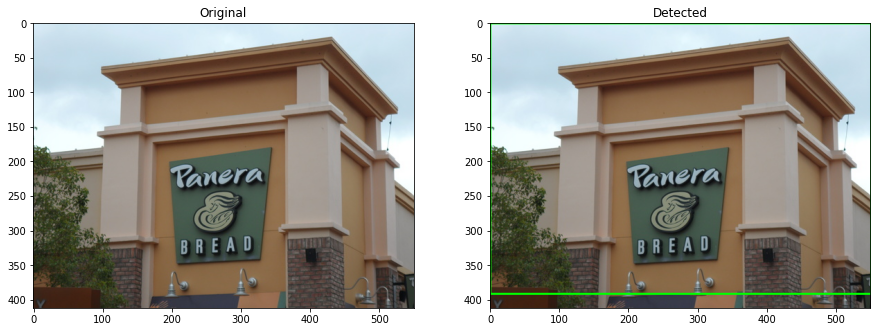

In [19]:
show_tesseract(2)

aoa yey) Plo ek \\\WY\\\\y \\W\\ y 


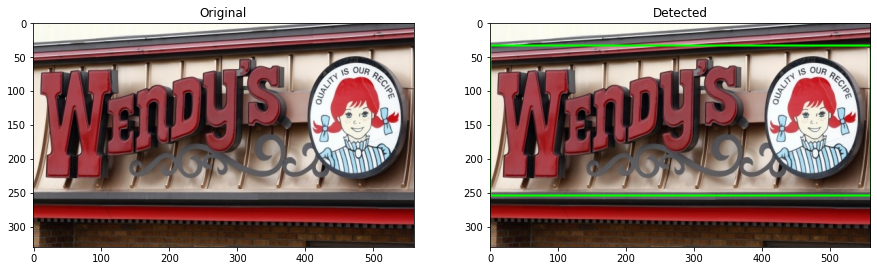

In [20]:
show_tesseract(16)

————— | oe - Ree easton |: Slats v ae ae we 


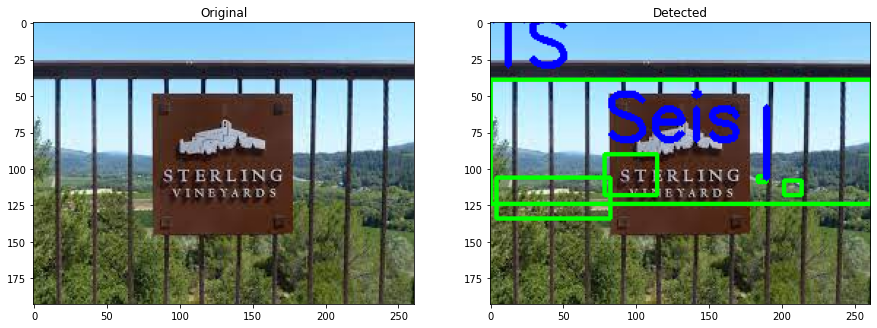

In [21]:
show_tesseract(10)

### keras-ocr

In [22]:
def show_keras(num):
    keras_ocr.tools.drawAnnotations(image=images[num], predictions=predictions[num][0])

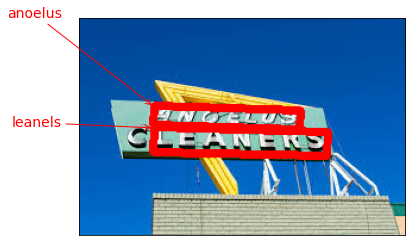

In [23]:
show_keras(1)

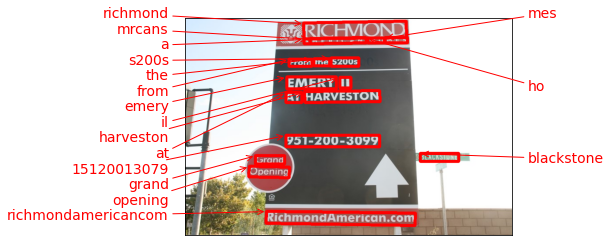

In [25]:
show_keras(17)

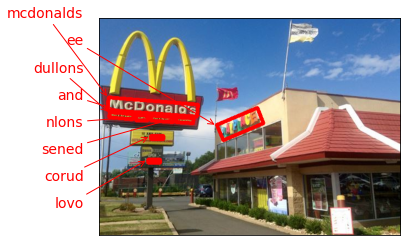

In [26]:
show_keras(11)

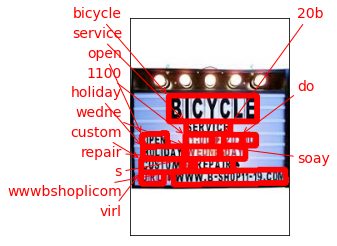

In [27]:
show_keras(5)

### Google OCR API

In [29]:
def show_google(num):
    name, text_dec, bounds = detect_text(images_path[num])
    image = Image.open(images_path[num])
    
    plt.figure(figsize=(15, 15))
    plt.subplot(121)
    org = image
    plt.imshow(org)
    plt.title('Original')
    plt.subplot(122)
    img = draw_boxes(image, bounds, 'red')
    plt.imshow(img)
    plt.title('Detected')
    print(text_dec[0])

In [30]:
show_google(6)

PermissionDenied: 403 This API method requires billing to be enabled. Please enable billing on project #742364165329 by visiting https://console.developers.google.com/billing/enable?project=742364165329 then retry. If you enabled billing for this project recently, wait a few minutes for the action to propagate to our systems and retry. [links {
  description: "Google developers console billing"
  url: "https://console.developers.google.com/billing/enable?project=742364165329"
}
, reason: "BILLING_DISABLED"
domain: "googleapis.com"
metadata {
  key: "consumer"
  value: "projects/742364165329"
}
metadata {
  key: "service"
  value: "vision.googleapis.com"
}
]

## Step4. 결과 분석과 결론 제시

Tesseract랑 keras-ocr이게 결과가 좋게 나온 것 같다. 딱 눈으로 보는 것은 keras-ocr 이 결과가 제일 좋게 나온 것을 확인 할 수 있다. 그래서 앞으로 또 이런 관련된 모델링을 하게 된다면 이번에 배운 여러가지 OCR 모델 중에서 keras-ocr 을 사용해서 좋은 결과값을 얻고 싶다!

# 회고!

## < 어려웠던 점>  
일단 처음 보았던 OCR 모델을 직접 코드 구현하는 게 어려웠던 것 같다... 그리고 자꾸 에러가 뜨는데 에러를 잡지도 못하겠고 뭐가 문젠지 알아낼 수 없어서 어려웠던 것 같다. 그리고 한국어는 결과값이 잘 나오지 않아서... 다시 영어로 바꾸는 어려움이 있었던 것 같다. 기회가 된다면 한국어로 OCR 모델을 구현해서 결과를 한 번 내보고 싶다고 생각했다. 

## < 알아낸 점> & < 아직까지 모호한 점>  
문자를 읽는 기술인 OCR은 산업적으로 매우 유용한 기술이다. 딥러닝이 도입된 이후에는 OCR 기술이 획기적으로 개선되어 많은 산업 도메인에 유용하게 사용될 수 있는 가능성이 있다.   

< OCR 기술 활용 사례>   
- 우편번호 추출을 통한 우편물 관리  
- 자동차 번호판 인식  
- 모바일 기기를 사용한 명함 인식  
- 신용카드 읽기를 이용한 결제 서비스  
- 컨테이너 일련번호 인식을 이용한 스마트 선박 시스템  

구글 OCR API 를 사용하면 사진속의 글자를 잘 읽을 수 있다.  
일단 파이썬으로 호출해서 테스트를 해서 확인할 수 있다,   

사진에 있는 문자를 읽을 수 있는 기능들이 많은데 직접 코드로 구현해보니까 더 신기했다. 근데 위에 에러들이 많이 뜨는데 결과랑 같이 떠서 이게 맞는건지 잘 모르겠다...에러의 원인을 잘 모르겠다...아직까지 정확한 이유를 찾지 못했지만...열심히 구글링을 해야겠다...

## < 자기 다짐>  
이번 노드는 또 너무 다급하게 해서 아쉬운 면이 많은 것 같다. 처음에 원리가 신기해서 다양한 방법으로 시도 해보고 싶다고 생각을 했지만, 시간을 많이 투자하지 않아서 그냥 노드를 제출하고 혼자 해봐야겠다... 그냥 지금 노드에 에러 투성이라서 볼 때마다 마음이 아프고 그렇지만....다음에는 더 열심히 해서 더 좋은 결과를 얻고싶다..ㅜㅜ 방학때 너무 놀아서,,,속상하다... 공부 계획을 짜서 했어야 하는데.. 방학도 끝났으니 열심히 해야겠다..화이팅...ㅎ